In [413]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble

from sklearn.model_selection import cross_val_score

%matplotlib inline

In [414]:
sms_raw = pd.read_csv('creditcard.csv')
sms_raw.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [415]:
# Count nulls 
null_count = sms_raw.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [416]:
print(sms_raw['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [417]:
#Try to bring them more in balance
fraud = sms_raw.loc[np.where(sms_raw['Class'] == 1)]
non_fraud = sms_raw.loc[np.where(sms_raw['Class'] == 0)]

# Take a random sample from the no's
msk = np.random.rand(len(non_fraud)) < 0.003
no_data = non_fraud[msk]

# Join the no data back with the yes's
df2 = no_data.append(fraud).dropna()

print(df2['Class'].value_counts())

0    868
1    492
Name: Class, dtype: int64


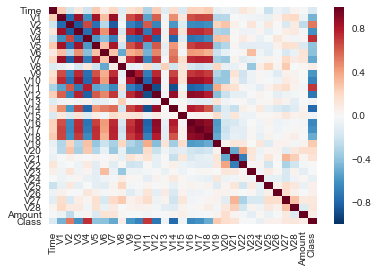

In [418]:
#See how the features relate to each other through a heatmap
sns.heatmap(df2.corr())

In [419]:
#Set up our training/testing data
msk = np.random.rand(len(df2)) < 0.8
train_data = df2[msk]
test_data = df2[~msk]

X_train = train_data.drop(['Class'], 1)
y_train = train_data['Class']
X_test = test_data.drop(['Class'], 1)
y_test = test_data['Class']

In [420]:
#Try by changing the features through PCA.
pca = PCA(n_components=5)
X_std_pca = pca.fit_transform(X_train)
X1 = pd.DataFrame(X_std_pca)

pca = PCA(n_components=5)
X_std_pca = pca.fit_transform(X_test)
X2 = pd.DataFrame(X_std_pca)

Let's first try Naive Bayes since it is famous for being used to detect credit card fraud.

For each of the models, we'll get the overall accuracy score and then break down their score for type I and type II errors. Since we are focusing on catching fraudulent charges, it's helpful to break it down to false positives and false negatives. We then take their cross validation score to make sure it's not overly fitted to a pocket of our data.

In [421]:
#Let's put our variables through Naive Bayes.
bnb = BernoulliNB()

#Fit the model.
bnb.fit(X1, y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#Take the score.
print('The accuracy score of this model is: {}'.format(bnb.score(X1, y_train)))
predict_train = bnb.predict(X1)
predict_test = bnb.predict(X2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print('Run this model through cross validation: \n{}'.format(cross_val_score(bnb, X1, y_train, cv=10)))


The accuracy score of this model is: 0.9423076923076923
Training set accuracy:
Percent Type I errors: 0.010073260073260074
Percent Type II errors: 0.047619047619047616

Test set accuracy:
Percent Type I errors: 0.026119402985074626
Percent Type II errors: 0.05223880597014925
Run this model through cross validation: 
[ 0.96363636  0.97272727  0.98181818  0.88181818  0.91743119  0.9266055
  0.98165138  0.91743119  0.94444444  0.93518519]


Bernoulli Bayes did a good job at predicting the fraud cases with relative few false positives and few false negatives.

Let's give Logistic regression (Ridge/Lasso), KNN, SVC and Random Forest a try to see how they compare.

In [422]:
#Let's put our variables through Lasso.
lr = LogisticRegression(C=1, penalty='l1')

#Fit the model.
lr.fit(X1, y_train)

print('The accuracy score for this model is: {}'.format(lr.score(X1, y_train)))
predict_train = lr.predict(X1)
predict_test = lr.predict(X2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print('Run this model through cross validation: \n{}'.format(cross_val_score(lr, X1, y_train, cv=10)))


The accuracy score for this model is: 0.9496336996336996
Training set accuracy:
Percent Type I errors: 0.009157509157509158
Percent Type II errors: 0.04120879120879121

Test set accuracy:
Percent Type I errors: 0.014925373134328358
Percent Type II errors: 0.03731343283582089
Run this model through cross validation: 
[ 0.99090909  0.83636364  0.97272727  0.9         0.89908257  0.9266055
  0.98165138  0.93577982  0.9537037   0.92592593]


In [423]:
#Let's put our variables through Ridge Regression.

lr = LogisticRegression(C=1, penalty='l2')

#Fit the model.
lr.fit(X1, y_train)

print('The accuracy score for this model is: {}'.format(lr.score(X1, y_train)))

predict_train = lr.predict(X1)
predict_test = lr.predict(X2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print('Run this model through cross validation: \n{}'.format(cross_val_score(lr, X1, y_train, cv=10)))


The accuracy score for this model is: 0.9294871794871795
Training set accuracy:
Percent Type I errors: 0.0009157509157509158
Percent Type II errors: 0.0695970695970696

Test set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.055970149253731345
Run this model through cross validation: 
[ 0.96363636  0.95454545  0.97272727  0.90909091  0.88990826  0.86238532
  0.99082569  0.90825688  0.91666667  0.91666667]


In [424]:
#Let's put our variables through a KNN Classifier.

neighbors = KNeighborsClassifier(n_neighbors=5)

#Fit the model.
neighbors.fit(X1, y_train)


print('The accuracy score for this model is: {}'.format(neighbors.score(X1, y_train)))
predict_train = neighbors.predict(X1)
predict_test = neighbors.predict(X2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print('Run this model through cross validation: \n{}'.format(cross_val_score(neighbors, X1, y_train, cv=10)))


The accuracy score for this model is: 0.7884615384615384
Training set accuracy:
Percent Type I errors: 0.07142857142857142
Percent Type II errors: 0.1401098901098901

Test set accuracy:
Percent Type I errors: 0.10820895522388059
Percent Type II errors: 0.29850746268656714
Run this model through cross validation: 
[ 0.35454545  0.14545455  0.03636364  0.01818182  0.01834862  0.39449541
  0.23853211  0.28440367  0.36111111  0.66666667]


In [425]:
#Let's put our variables through a random forest classifer.

rfc = ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                      bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                                      warm_start=False, class_weight=None)
#Fit the model
rfc.fit(X1, y_train)

predict_train = rfc.predict(X1)
predict_test = rfc.predict(X2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print('The accuracy score for this model is: {}'.format(rfc.score(X1, y_train)))
print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print('Run this model through cross validation: \n{}'.format(cross_val_score(rfc, X1, y_train, cv=10)))


The accuracy score for this model is: 0.9917582417582418
Training set accuracy:
Percent Type I errors: 0.0018315018315018315
Percent Type II errors: 0.00641025641025641

Test set accuracy:
Percent Type I errors: 0.22761194029850745
Percent Type II errors: 0.029850746268656716
Run this model through cross validation: 
[ 0.44545455  0.97272727  0.95454545  0.86363636  0.89908257  0.9266055
  0.98165138  0.89908257  0.94444444  0.89814815]


In [426]:
#Let's put our variables through a gradient booster.

clf = ensemble.GradientBoostingClassifier(loss='exponential', learning_rate=1.0, n_estimators=10, subsample=1.0, 
                                          criterion='friedman_mse', min_samples_split=1.0, min_samples_leaf=1, 
                                          min_weight_fraction_leaf=0.0, max_depth=None, min_impurity_decrease=0.0, 
                                          min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                          verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
#Fit the model.
clf.fit(X1, y_train)

predict_train = clf.predict(X1)
predict_test = clf.predict(X2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print('The accuracy score for this model is: {}'.format(clf.score(X1, y_train)))
print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print('Run this model through cross validation: \n{}'.format(cross_val_score(clf, X1, y_train, cv=10)))


The accuracy score for this model is: 0.9487179487179487
Training set accuracy:
Percent Type I errors: 0.013736263736263736
Percent Type II errors: 0.037545787545787544

Test set accuracy:
Percent Type I errors: 0.048507462686567165
Percent Type II errors: 0.029850746268656716
Run this model through cross validation: 
[ 0.81818182  0.95454545  0.95454545  0.86363636  0.91743119  0.9266055
  0.98165138  0.88990826  0.93518519  0.89814815]


The Bernoulli and Ridge models seemed to work the best when taken in a complete picture. Gradient Boosting performed well with a 0.957 accuracy and relatively low type I and type II error rates, but the cross validation scores underperformed. This was the same problem that afflicted Random Forest. Ideally, the accuracy score should be closer to how KNN performed, but KNN had abysmal cross validation scores.

The models that performed the best out of all of the models was Bernoulli Bayes and Ridge Logistic Regression.